In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import collections
import numpy as np
import matplotlib
import datetime

## Original dataset - approach based on amount of logins per day

#### Decided to read in only 1million rows 

In [4]:
df_1 = pd.read_csv(r'C:\Users\judit.gyorfi\Downloads\dataset_1.csv',sep=',', header = None, skiprows= 1000000, nrows=1000000)
df_1.columns = ['datevalue', 'LicenseCount', 'deviceid']
df_1

,datevalue,LicenseCount,deviceid
0,2020-11-24 00:00:00.000,17,NzYxZDE1YjNhMWJhZmQzOGJkM2E3Y2VkZWYwZjc4Mzg=
1,2020-11-24 00:00:00.000,2,YjRiYTczNTUxNmEwODQ5YTU4NDA4NDEzNGE5YWRiNjk=
2,2020-11-24 00:00:00.000,17,ZGMzZTQ1ZmNiOTEwZTg2OTdlMWFiMGJiZWFkZjc0N2I=
3,2020-11-24 00:00:00.000,11,YzI1YTQ0NGFmZTdkMzgxZDUwM2FjZjMzZTQyMzk0NjA=
4,2020-11-24 00:00:00.000,14,ZmYzOTA1N2YwZmUwYWVlNTc0OGU3ODNkYWMxZWI2Y2M=
...,...,...,...
999995,2020-09-05 00:00:00.000,3,ZTY2NTIxYmY3NjM3MjI0MTAzYTBmYTE2MGM3YmEwMDA=
999996,2020-09-05 00:00:00.000,10,N2FhZDgxOTJlMTI4ZmQxYjYwM2QyZDdmMDdmMzgxYzA=
999997,2020-09-05 00:00:00.000,2,YjVlYjIwZTNiNWYzMTY2MTcxMGU5ZGQ1NGZiY2Q4Mjg=
999998,2020-09-05 00:00:00.000,1,tTuPYdoGiJyHpGhrWye2rg==


In [5]:
df_1_sorted = df_1.sort_values('LicenseCount', ascending=False)
df_1_sorted = df_1_sorted[:1000]
df_1_sorted

,datevalue,LicenseCount,deviceid
536684,2021-01-26 00:00:00.000,857608,NDgxZGVjZGQxMGZiYmNkZjY4Mjk4Y2VkMWUyMTg5NWY=
953920,2020-11-16 00:00:00.000,706916,NDgxZGVjZGQxMGZiYmNkZjY4Mjk4Y2VkMWUyMTg5NWY=
861562,2020-08-23 00:00:00.000,400902,NDgxZGVjZGQxMGZiYmNkZjY4Mjk4Y2VkMWUyMTg5NWY=
403425,2020-08-19 00:00:00.000,400252,NDgxZGVjZGQxMGZiYmNkZjY4Mjk4Y2VkMWUyMTg5NWY=
610718,2020-06-07 00:00:00.000,198340,NDgxZGVjZGQxMGZiYmNkZjY4Mjk4Y2VkMWUyMTg5NWY=
...,...,...,...
420497,2020-10-11 00:00:00.000,177,NmNjOTU1MzAxOGViYzk2MTcxZjk5NWVkMzlmNzJjZTM=
521789,2020-05-06 00:00:00.000,177,MmMwMDczZGYxOWQ4MWI5NjM5NzZmNDA2ZDA1MzZkNzg=
397655,2020-09-22 00:00:00.000,177,YmQxMjZiZjAxZTRhM2E1YTQ3OTA2ZGU2NWYyYTY0NTA=
46413,2020-04-16 00:00:00.000,177,YmQwZDI0MDc5OTI1ZGU4NzEyMWI3OGFkOTMzY2FiMWU=


In [6]:
print(df_1['datevalue'].min())
print(df_1['datevalue'].max())
print(len(df_1['deviceid']))

2020-01-16 00:00:00.000
2021-01-26 00:00:00.000
1000000


#### There are 49 devices that have appeared more than 7 times 
<ul>
<li>what does this mean?</li>
</ul>


In [7]:
y = df_1['deviceid'].value_counts()
y = y[y>7].index.tolist()
len(y)

49

<AxesSubplot:>

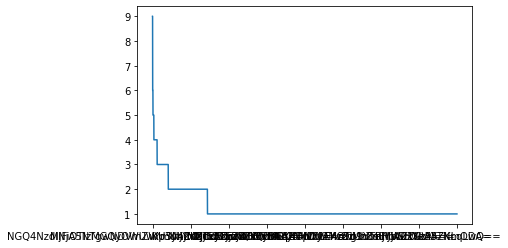

In [8]:
df_1['deviceid'].value_counts().plot()

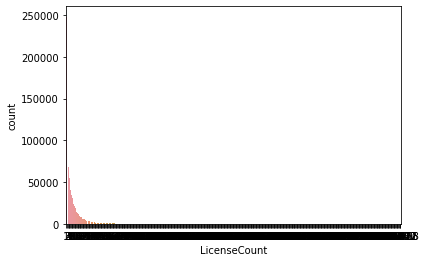

In [9]:
import seaborn as sns
#sns.set_theme(style="darkgrid")
ax = sns.countplot(x='LicenseCount', data=df_1)

In [10]:
df_2 = pd.read_csv(r'C:\Users\judit.gyorfi\Downloads\dataset_2.csv',sep=',', header = None, skiprows= 10000000, nrows=10000000)
df_2.columns = ['datevalue', 'LicenseCount', 'sessionuserid']
df_2

,datevalue,LicenseCount,sessionuserid
0,2020-04-20 00:00:00.000,17,CAR.202:589247802
1,2020-04-20 00:00:00.000,7,NTX.8260:8260130222680640
2,2020-04-20 00:00:00.000,1,CHARTER.8246:8246100060218075
3,2020-04-20 00:00:00.000,18,NER.202:153781718
4,2020-04-20 00:00:00.000,29,CHARTER.8245:8245115070040096
...,...,...,...
9999995,2020-10-23 00:00:00.000,7,LXM.8448:8448200018383520
9999996,2020-10-23 00:00:00.000,8,STX.8260:8260141466514684
9999997,2020-10-23 00:00:00.000,11,NEW.004:700072503
9999998,2020-10-23 00:00:00.000,4,LXM.8448:8448200210390059


#### Very skewed dataset -> can not really understand the distribution of it

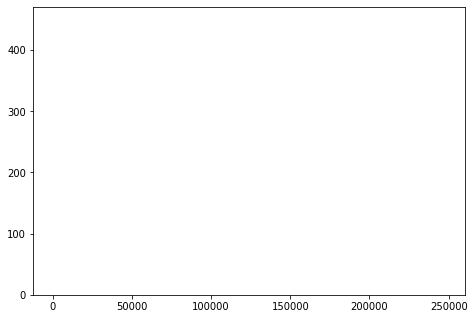

In [11]:
ctr = collections.Counter(df_1.LicenseCount)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
#print("Frequency of the elements in the List : ",ctr)
ax.bar(ctr.values(),range(len(ctr)))
plt.show()

(9000.0, 150000.0)

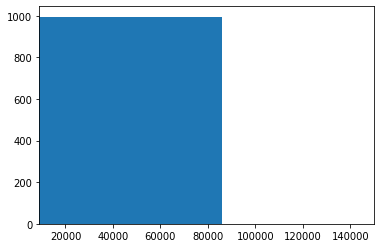

In [12]:
plt.hist(df_1_sorted.LicenseCount)
plt.xlim(9000,150000)

#### Very few outliers in the first dataset (deviceid)

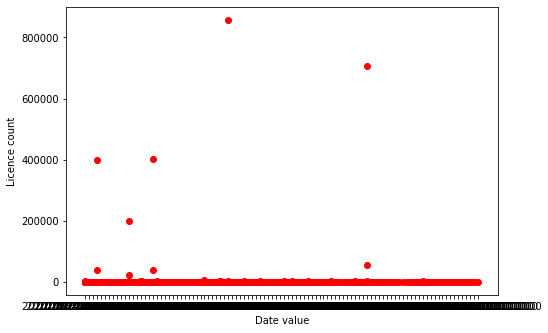

In [13]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df_1.datevalue, df_1.LicenseCount, color='r')
ax.set_xlabel('Date value')
ax.set_ylabel('Licence count')
plt.show()

#### Very different distribution in the second dataset (sessionuserid) 
<ul>
<li>What is the sessionuserid?</li>
</ul>

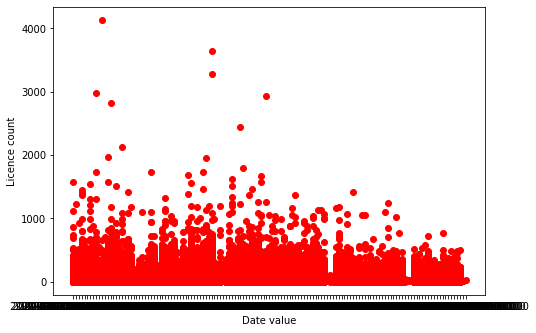

In [14]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df_2.datevalue, df_2.LicenseCount, color='r')
ax.set_xlabel('Date value')
ax.set_ylabel('Licence count')
plt.show()

## Original dataset - approach based on usersessionid


In [15]:
df_2_copy = df_2.copy()

In [16]:
df_2_copy.dtypes

datevalue        object
LicenseCount      int64
sessionuserid    object
dtype: object

In [17]:
df_2_copy.sort_values('sessionuserid', ascending=True)

,datevalue,LicenseCount,sessionuserid
9712099,2020-12-17 00:00:00.000,1,00065b00-fde7-11e9-9b53-005056a7c4a3
8298150,2020-12-14 00:00:00.000,2,00065b00-fde7-11e9-9b53-005056a7c4a3
7583876,2021-01-01 00:00:00.000,3,00125CD9-4128-6E31-5945-2BC6D1CB79BC
4986061,2020-10-07 00:00:00.000,1,00125CD9-4128-6E31-5945-2BC6D1CB79BC
4659089,2020-12-21 00:00:00.000,5,001432EE-F107-9A18-69D0-5C0B02D5428C
...,...,...,...
7569313,2020-12-21 00:00:00.000,1,NaN
8284747,2020-12-11 00:00:00.000,3,NaN
8956813,2021-01-14 00:00:00.000,5,NaN
9197422,2020-09-15 00:00:00.000,1,NaN


In [18]:
df_2_copy.isna().sum()

datevalue        0
LicenseCount     0
sessionuserid    9
dtype: int64

In [19]:
df_2_copy['sessionuserid'].value_counts()

NER.202:189443603            39
LXM.8448:8448300080026807    39
NER.202:219174001            39
NYC.8150:8150100070324248    39
NYC.8150:8150110010583936    39
                             ..
NER.202:711057006             1
NTX.8260:8260170624068002     1
NER.202:626463606             1
CAK.001:215982606             1
LXM.8448:8448200188922248     1
Name: sessionuserid, Length: 2133776, dtype: int64

In [20]:
group = df_2_copy.groupby(['sessionuserid']).sum()
group['average_licencecount'] = df_2_copy.groupby(['sessionuserid']).mean()
#group['min_licencecount'] = df_2_copy.groupby(['sessionuserid']).min()
#group['max_licencecount'] = df_2_copy.groupby(['sessionuserid']).max()
group['std_licencecount'] = df_2_copy.groupby(['sessionuserid']).std()
group['var_licencecount'] = df_2_copy.groupby(['sessionuserid']).var()
group = group.sort_values('LicenseCount', ascending=False)
group

,LicenseCount,average_licencecount,std_licencecount,var_licencecount
sessionuserid,,,,
NYC.8150:8150150010311268,27522,917.400000,362.590260,131471.696552
NYC.8150:8150100063661101,21142,783.037037,369.944848,136859.190883
CMH.002:433447501,16648,640.307692,494.580207,244609.581538
BHN.003:199333901,13672,546.880000,228.469057,52198.110000
NTX.8260:8260170621817542,13643,620.136364,352.551421,124292.504329
...,...,...,...,...
NTX.8260:8260132086230017,1,1.000000,NaN,NaN
CHARTER.8351:8351200110693722,1,1.000000,NaN,NaN
CHARTER.8351:8351200110676842,1,1.000000,NaN,NaN


In [21]:
merge = group.merge(df_2_copy, left_on='sessionuserid', right_on='sessionuserid')

In [22]:
merge['diff%'] = merge['LicenseCount_y'] / merge['average_licencecount']

In [23]:
merge.loc[(merge['diff%'] > 1.3) | (merge['diff%'] < 0.7), 'diff'] = '1'   
merge = merge[merge['diff'] == '1']
merge = merge[merge['LicenseCount_x'] > 1000]


In [24]:
merge = merge.sort_values('diff%', ascending=False)
merge

,sessionuserid,LicenseCount_x,average_licencecount,std_licencecount,var_licencecount,datevalue,LicenseCount_y,diff%,diff
79385,CHARTER.8353:8353500231149217,1080,46.956522,177.315455,3.144077e+04,2021-01-27 00:00:00.000,859,18.293519,1
4030,NTX.8260:8260170162470040,3231,161.550000,652.187854,4.253490e+05,2020-05-09 00:00:00.000,2932,18.149180,1
60624,CHARTER.8245:8245100800363364,1215,45.000000,150.723384,2.271754e+04,2020-08-13 00:00:00.000,798,17.733333,1
54751,CMH.002:453321003,1266,63.300000,247.857366,6.143327e+04,2020-04-20 00:00:00.000,1116,17.630332,1
10460,BHN.003:502452201,2406,100.250000,348.398978,1.213818e+05,2020-09-21 00:00:00.000,1733,17.286783,1
...,...,...,...,...,...,...,...,...,...
69482,LXM.8448:8448300660417665,1146,382.000000,659.911358,4.354830e+05,2020-12-14 00:00:00.000,1,0.002618,1
69483,LXM.8448:8448300660417665,1146,382.000000,659.911358,4.354830e+05,2020-09-21 00:00:00.000,1,0.002618,1
4978,NER.202:759613401,2986,597.200000,1328.672533,1.765371e+06,2020-04-19 00:00:00.000,1,0.001674,1
253,LXM.8448:8448200016811076,9655,1206.875000,1541.611072,2.376565e+06,2020-06-26 00:00:00.000,2,0.001657,1


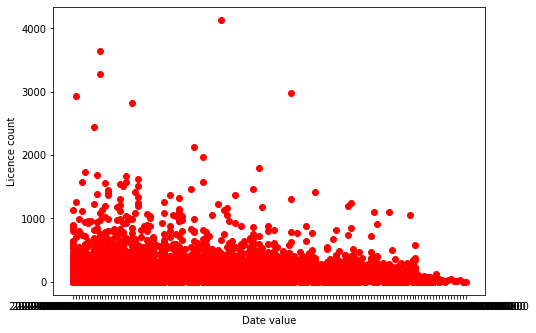

In [25]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(merge.datevalue, merge.LicenseCount_y, color='r')
ax.set_xlabel('Date value')
ax.set_ylabel('Licence count')
plt.show()

## Filtered dataset - approach based on usersessionid
#### -200- This file contains daily license usage of 107,274 unique subscription IDs. These IDs are associated with more than 200 rows/days of data. Each row relates to three columns: date, license usage and the ID. The number of rows is 26,435,830.
#### -300- This file contains daily license usage of 4,563 unique subscription IDs. These IDs are associated with more than 300 rows/days of data. Each row relates to three columns: date, license usage and the ID. The number of rows is 1,411,638.

In [26]:
df_3 = pd.read_csv(r'C:\Users\judit.gyorfi\Downloads\sessionuserid_daily_usage_200.csv')
df_3 = df_3.drop(columns='Unnamed: 0')

In [27]:
len(df_3)

26435830

In [28]:
print(df_3['datevalue'].min())
print(df_3['datevalue'].max())
print(df_3['LicenseCount'].min())
print(df_3['LicenseCount'].max())

2020-01-08
2021-01-27
1
7213


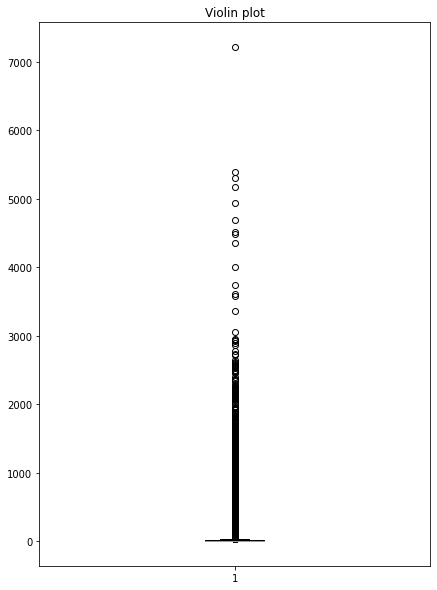

In [29]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7, 10))
axs.boxplot(df_3.LicenseCount)
axs.set_title('Violin plot')
plt.show()

In [30]:
group_2 = df_3.groupby(['sessionuserid']).sum()
#group_2 = group_2.drop(columns='Unnamed: 0')
group_2['average_licencecount'] = df_3.groupby(['sessionuserid']).mean()
group_2['std_licencecount'] = df_3.groupby(['sessionuserid']).std()
group_2['var_licencecount'] = df_3.groupby(['sessionuserid']).var()
group_2 = group_2.sort_values('LicenseCount', ascending=False)
group_2

,LicenseCount,average_licencecount,std_licencecount,var_licencecount
sessionuserid,,,,
NYC.8150:8150100063661101,275248,908.409241,865.800570,749610.626669
NYC.8150:8150150010311268,271603,930.147260,342.627289,117393.459340
TWC.999:900028101,221133,688.887850,522.191051,272683.493633
CMH.002:433447501,183519,630.649485,552.456933,305208.662922
BHN.003:199333901,157945,521.270627,200.315594,40126.337115
...,...,...,...,...
MKE.004:042959701,234,1.103774,0.335265,0.112403
CHARTER.8345:8345780150119760,234,1.093458,0.513347,0.263525
NTX.8260:8260170290141034,233,1.088785,0.450941,0.203348


In [31]:
merge = group_2.merge(df_3, left_on='sessionuserid', right_on='sessionuserid')

In [32]:
merge['diff%'] = merge['LicenseCount_y'] / merge['average_licencecount']

In [33]:
merge.loc[(merge['diff%'] > 1.3) | (merge['diff%'] < 0.7), 'diff'] = '1'   
merge = merge[merge['diff'] == '1']
merge = merge[merge['LicenseCount_x'] > 1000]

In [34]:
merge = merge.sort_values('diff%', ascending=False)
merge

,sessionuserid,LicenseCount_x,average_licencecount,std_licencecount,var_licencecount,datevalue,LicenseCount_y,diff%,diff
3835648,CHARTER.8752:8752200300106696,5819,19.332226,258.477496,66810.615925,2020-06-19,4488,232.151229,1
3439169,CAR.202:268245915,6197,21.150171,233.237088,54399.539015,2020-05-19,3998,189.029208,1
10599430,CAK.001:221036902,3018,9.993377,108.544952,11782.006601,2020-04-16,1887,188.825050,1
5978268,NYC.8150:8150120012457427,4476,17.484375,159.775013,25528.054657,2020-07-23,2562,146.530831,1
6884702,CHARTER.8245:8245116001010430,4098,15.945525,144.543560,20892.840771,2020-05-07,2188,137.217179,1
...,...,...,...,...,...,...,...,...,...
2314,LXM.8448:8448300747050034,134558,494.698529,340.847453,116176.986271,2020-04-25,1,0.002021,1
2146,LXM.8448:8448300747050034,134558,494.698529,340.847453,116176.986271,2020-06-22,1,0.002021,1
1591,NTX.8260:8260170621817542,153331,545.661922,410.969693,168896.088866,2020-11-21,1,0.001833,1
752,TWC.999:900028101,221133,688.887850,522.191051,272683.493633,2020-02-10,1,0.001452,1


In [35]:
anom_1 = merge['sessionuserid'][:10]
anom_1 = anom_1.to_list()
anom_1

['CHARTER.8752:8752200300106696',
 'CAR.202:268245915',
 'CAK.001:221036902',
 'NYC.8150:8150120012457427',
 'CHARTER.8245:8245116001010430',
 'BHN.003:312092605',
 'NTX.8260:8260170120015507',
 'CHARTER.8245:8245100407540968',
 'BHN.003:481494702',
 'BHN.003:194192009']

In [48]:
new = merge[merge['sessionuserid'].isin(anom_1)].sort_values('sessionuserid', ascending=True)
new

,sessionuserid,LicenseCount_x,average_licencecount,std_licencecount,var_licencecount,datevalue,LicenseCount_y,diff%,diff
19379000,BHN.003:194192009,1645,8.063725,69.384563,4814.217594,2020-11-07,2,0.248024,1
19378906,BHN.003:194192009,1645,8.063725,69.384563,4814.217594,2020-04-14,2,0.248024,1
19378879,BHN.003:194192009,1645,8.063725,69.384563,4814.217594,2020-08-16,2,0.248024,1
19379066,BHN.003:194192009,1645,8.063725,69.384563,4814.217594,2020-05-22,2,0.248024,1
19378891,BHN.003:194192009,1645,8.063725,69.384563,4814.217594,2020-06-01,2,0.248024,1
...,...,...,...,...,...,...,...,...,...
5978318,NYC.8150:8150120012457427,4476,17.484375,159.775013,25528.054657,2020-12-21,4,0.228776,1
5978468,NYC.8150:8150120012457427,4476,17.484375,159.775013,25528.054657,2020-07-07,8,0.457551,1
5978300,NYC.8150:8150120012457427,4476,17.484375,159.775013,25528.054657,2020-07-02,4,0.228776,1
5978425,NYC.8150:8150120012457427,4476,17.484375,159.775013,25528.054657,2020-04-25,8,0.457551,1


[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 14, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 7, 4, 10, 10, 10, 10, 7, 10, 10, 10, 10, 10, 10, 5, 10, 3, 7, 7, 3, 3, 14, 3, 3, 4, 7, 4, 4, 7, 7, 7, 7, 7, 4, 2, 1, 1, 5, 5, 5, 7, 7, 7, 7, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 12, 14, 12, 12, 11, 11, 1, 1, 1, 1, 1, 11, 1, 1, 1, 10, 1, 1, 1, 1, 1, 11, 11, 11, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 1, 1, 1, 1, 11, 11, 11, 12, 10, 10, 10, 8, 6, 8, 8, 8, 8, 8, 6, 6, 6, 6, 6, 10, 6, 6, 6, 6, 6, 6, 6, 6, 37, 6, 6, 6, 6, 6, 8, 8, 2, 34, 2, 2, 2, 2, 2, 2, 2, 2, 56, 66, 2, 2, 30, 3998, 28, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 9, 9, 9, 9, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 9, 9, 4, 9, 6, 6, 6, 6, 6, 6, 6, 8, 8, 8, 8, 8, 9, 4, 14, 9, 9, 4, 9, 9, 9, 9, 9, 9, 9, 4, 9, 9]


<ipython-input-41-d99692eb9f47>:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


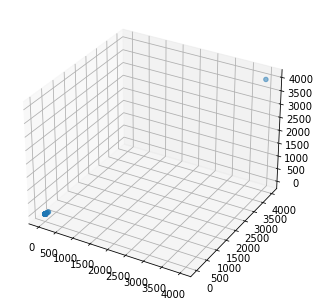

[8, 10, 10, 10, 10, 10, 10, 5, 10, 5, 5, 5, 5, 5, 5, 5, 5, 10, 10, 10, 10, 8, 9, 9, 9, 9, 9, 11, 10, 9, 9, 9, 9, 9, 10, 8, 10, 9, 11, 11, 11, 2, 2, 2, 2, 2, 2, 24, 2, 25, 26, 2, 27, 2, 2, 28, 29, 30, 2, 2, 35, 38, 2, 2, 2, 2, 2, 2, 2562, 29, 5, 5, 5, 11, 11, 9, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 5, 12, 12, 12, 12, 5, 5, 5, 5, 5, 5, 5, 5, 11, 9, 6, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 4, 4, 4, 3, 3, 3, 3, 3, 1, 3, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 1, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 6, 6, 8, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 8, 4, 8, 4]


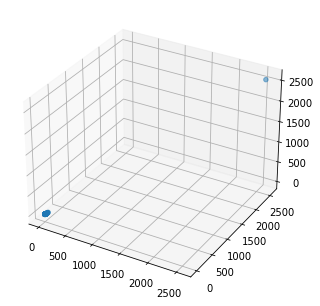

[5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 6, 6, 3, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6, 6, 6, 5, 6, 1, 6, 4, 4, 4, 4, 4, 4, 4, 15, 6, 4, 4, 4, 4, 4, 15, 4, 2, 2, 7, 7, 7, 7, 7, 7, 2, 7, 7, 7, 7, 7, 7, 7, 7, 4, 4, 16, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1505, 4, 4, 4, 18, 16, 16, 16, 4, 4, 4, 17, 4, 4, 4, 4, 4, 4, 4, 4, 7, 7, 4, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 7, 2, 7, 7, 2, 2, 2, 7, 7, 7, 7, 1, 1, 1, 7, 7, 7, 7, 7, 2, 7, 2]


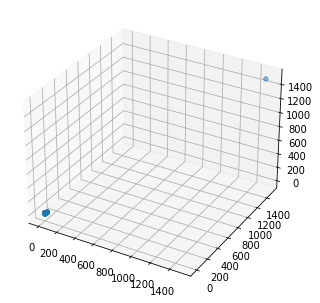

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 34, 34, 30, 29, 26, 13, 12, 11, 11, 11, 10, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 2, 9, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 8, 9, 9, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 2, 4488, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 5, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 3, 4, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4]


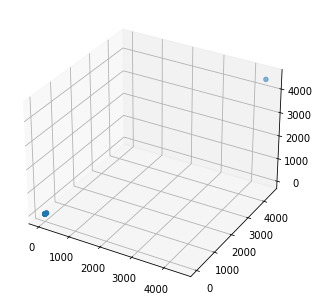

[3, 3, 3, 3, 3, 3, 3, 1880, 3, 3, 10, 10, 10, 7, 7, 3, 7, 7, 3, 3, 3, 3, 3, 7, 3, 7, 20, 7, 7, 7, 7, 7, 7, 3, 10, 8, 8, 3, 3, 9, 9, 9, 9, 9, 9, 3, 3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 3, 7, 3, 10, 10, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 10, 10, 10, 7, 7, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 5, 6, 3, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 5, 4, 3, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4]


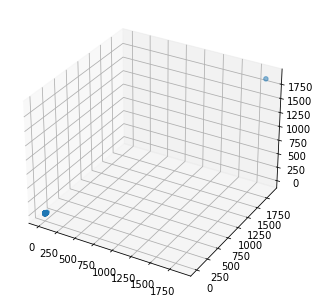

[4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 2, 2, 2, 2, 2, 2, 8, 8, 2, 4, 7, 7, 4, 4, 4, 4, 4, 4, 4, 7, 2, 2, 2, 2, 2, 2, 2, 7, 2, 6, 6, 1, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 6, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 2188, 787, 11, 11, 11, 11, 11, 11, 11, 10, 10, 9, 9, 9, 9, 9, 9, 3, 3, 3, 3, 3, 8, 3, 8, 8, 8, 8, 8, 8, 8, 8, 5, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 2]


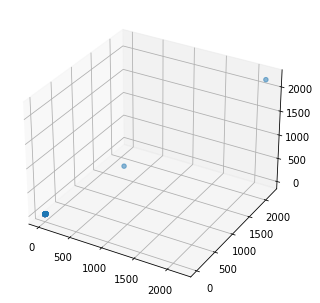

[1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 13, 15, 17, 21, 101, 1887, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 6, 6, 4, 4, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


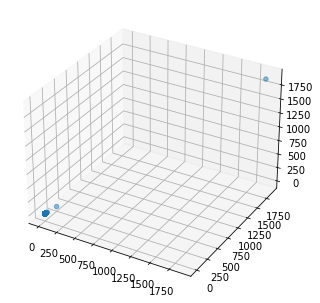

[2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 3, 3, 14, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 34, 1, 993, 1, 1, 1, 4, 1, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 16, 17, 4, 4, 4, 3, 4, 4, 4, 4, 3, 3, 4, 3, 4, 3, 4, 4, 3, 22, 3, 3, 3, 3, 3, 3]


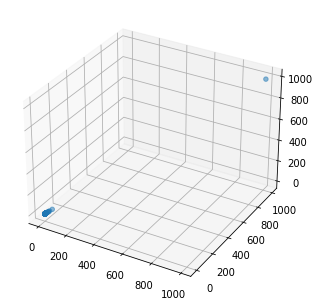

[4, 2, 5, 5, 5, 5, 2, 4, 5, 5, 5, 2, 2, 2, 5, 5, 5, 5, 5, 5, 4, 2, 4, 4, 4, 6, 2, 2, 6, 6, 6, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 6, 6, 2, 2, 2, 4, 4, 4, 6, 4, 4, 4, 4, 4, 6, 6, 6, 4, 2, 1, 2, 3, 3, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 2, 8, 8, 8, 8, 8, 3, 2, 3, 3, 20, 20, 20, 22, 22, 20, 20, 23, 23, 3, 3, 24, 3, 3, 1794, 3, 3, 3, 3, 3, 3, 32, 32, 34, 3, 3, 48, 3, 3, 3, 25, 2, 8, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 2, 7, 7, 2, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 7, 7, 2, 7, 7, 7, 7, 7, 7]


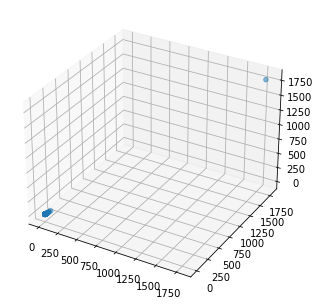

[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 6, 7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 2, 3, 2, 2, 6, 6, 2, 2, 2, 2, 4, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 1, 16, 5392, 2920, 561, 9, 9, 1, 13]


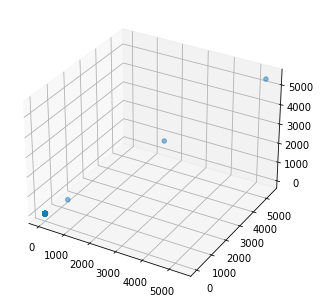

In [41]:
from mpl_toolkits.mplot3d import Axes3D
for i in set(new['sessionuserid']):
    fig = plt.figure()
    ax = Axes3D(fig)
    x = new.loc[new['sessionuserid'].isin([i])]
    ax.scatter(x.LicenseCount_y, x.LicenseCount_y, x.LicenseCount_y, alpha=0.5)
    print(list(x.LicenseCount_y))
    plt.show()

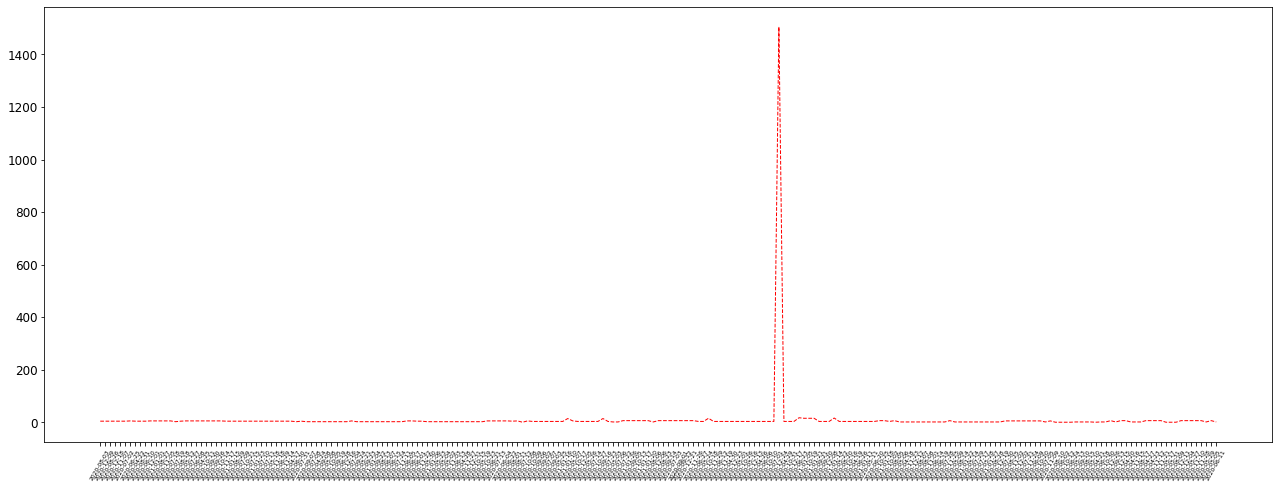

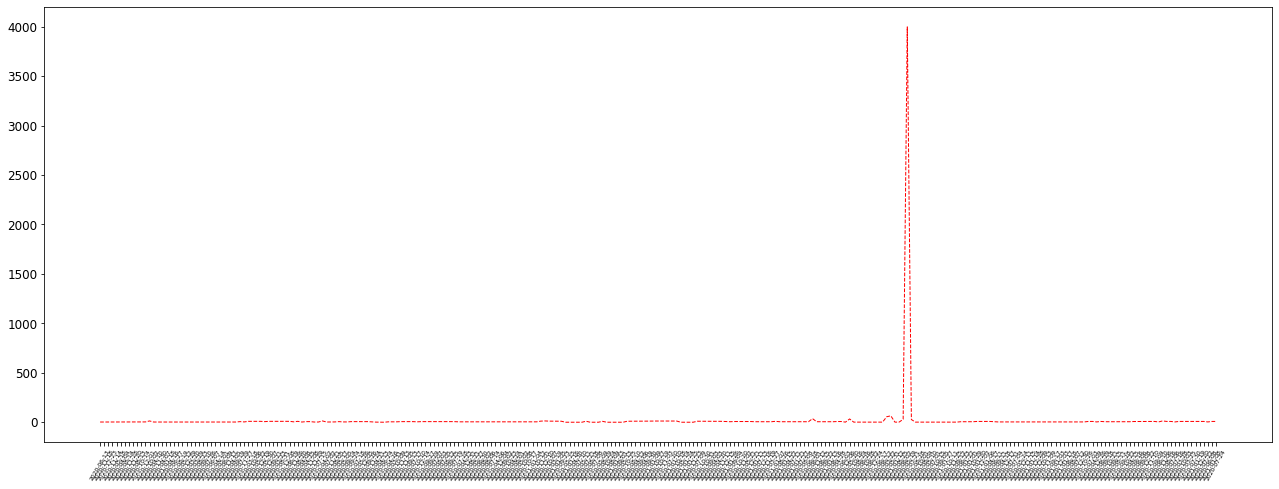

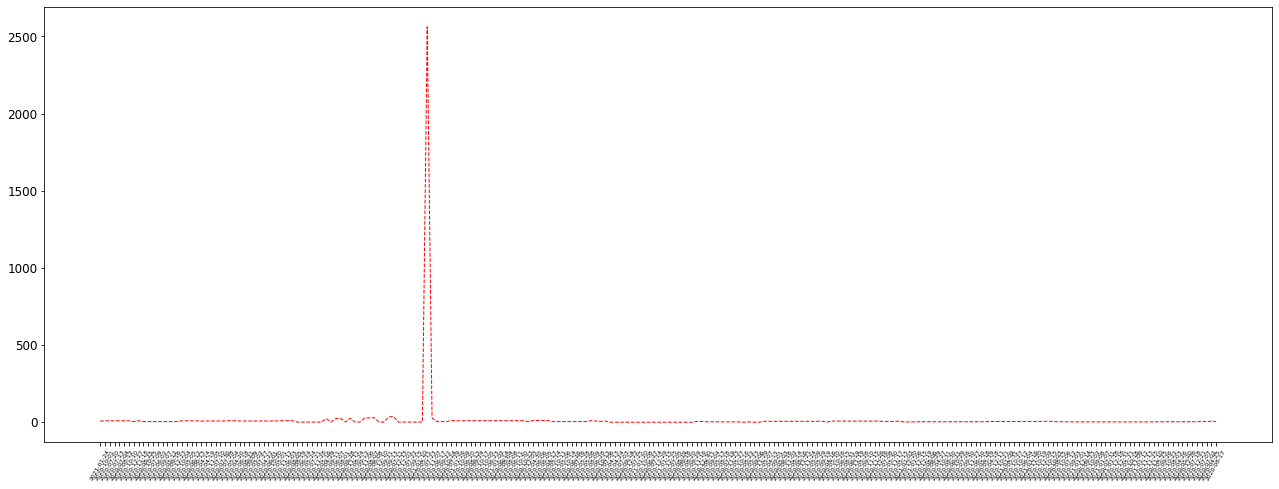

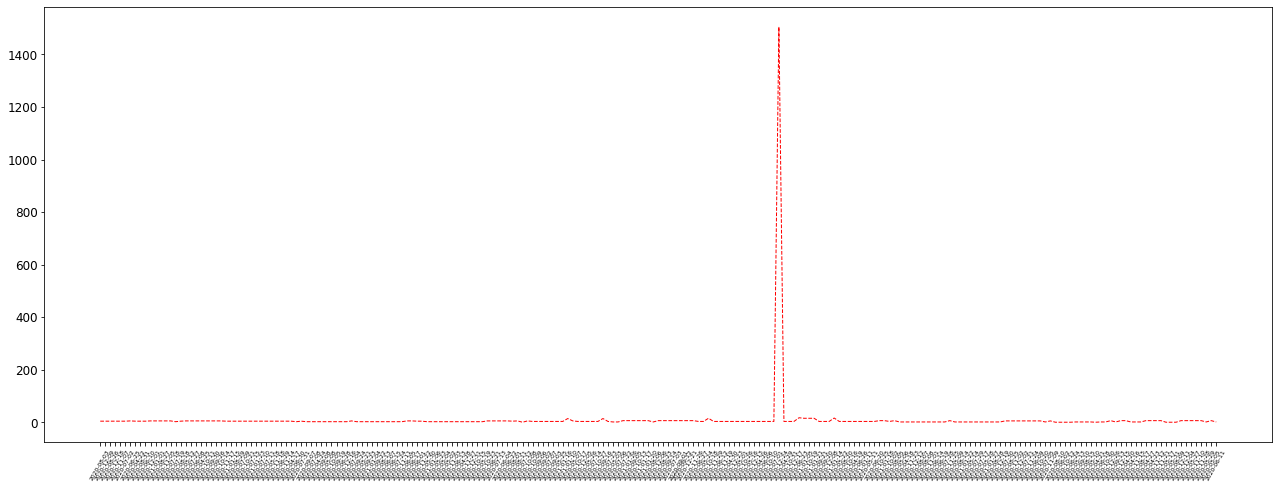

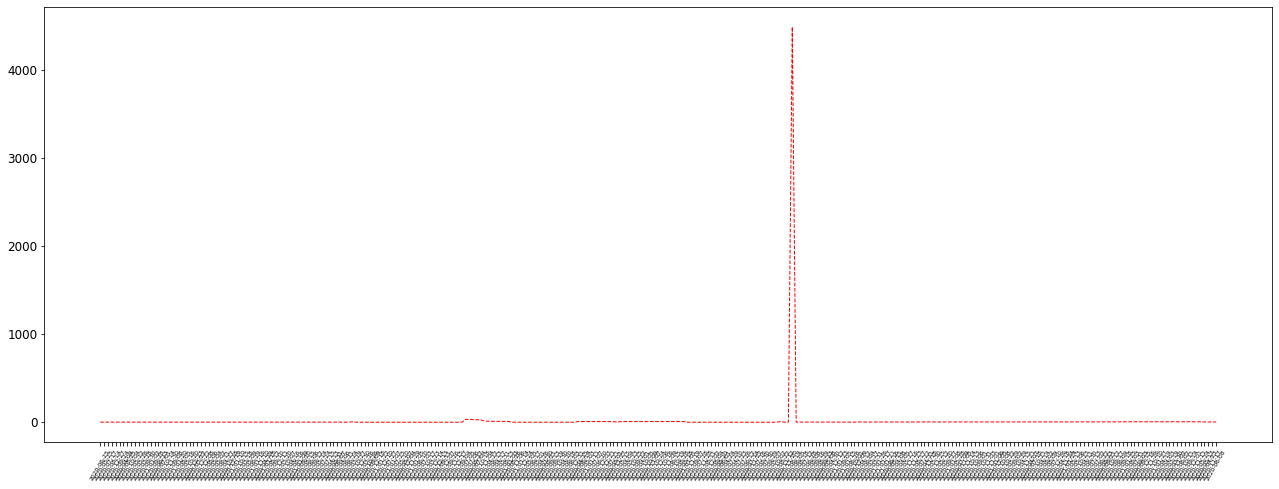

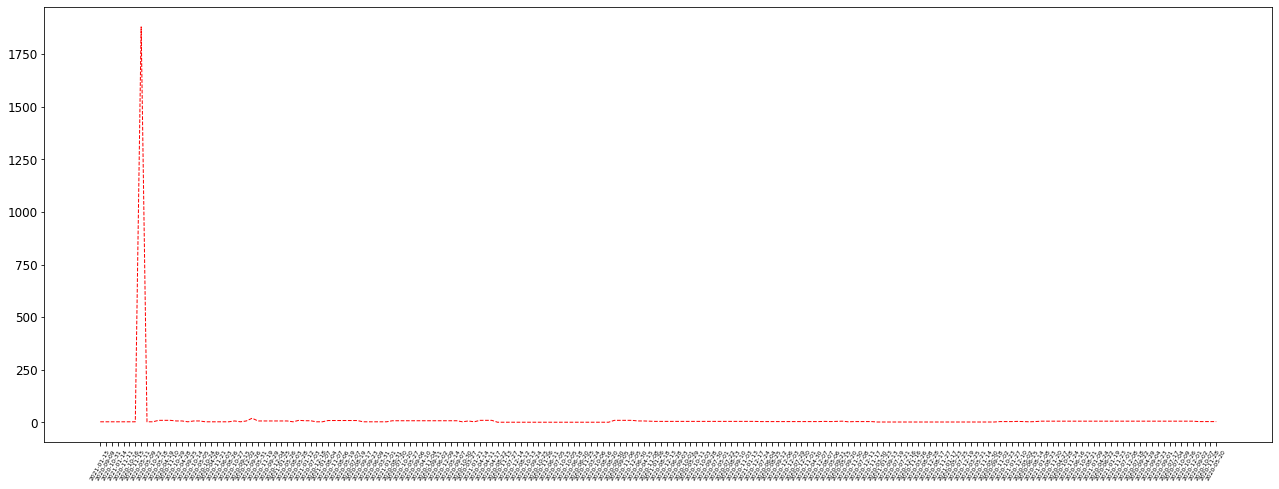

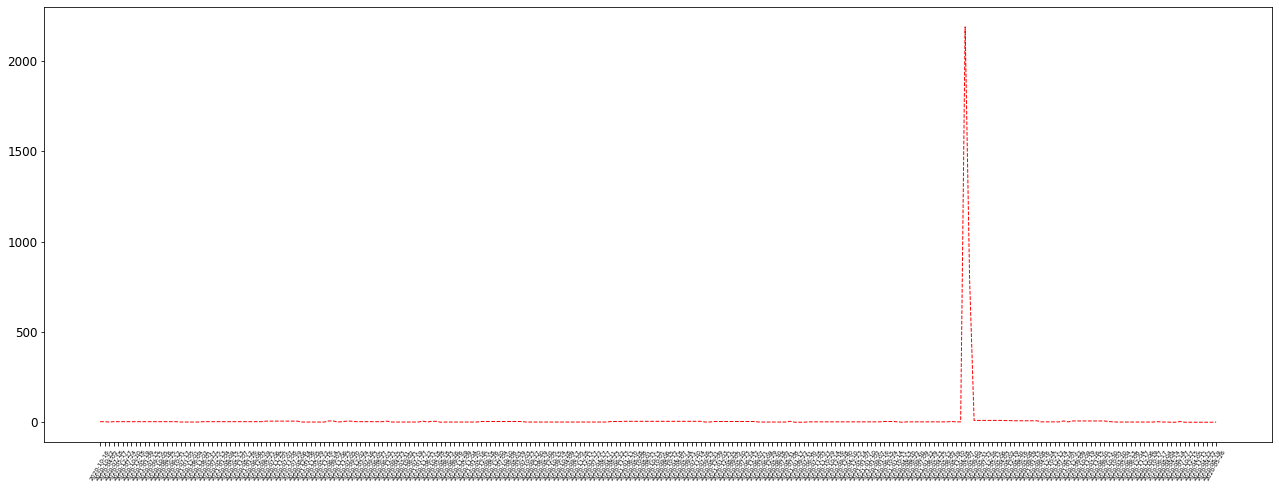

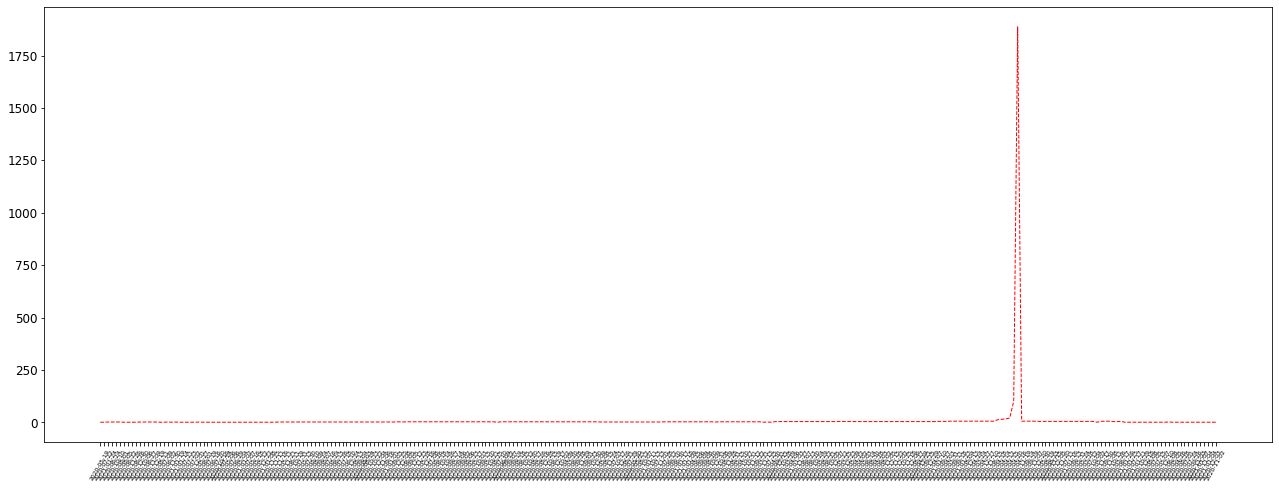

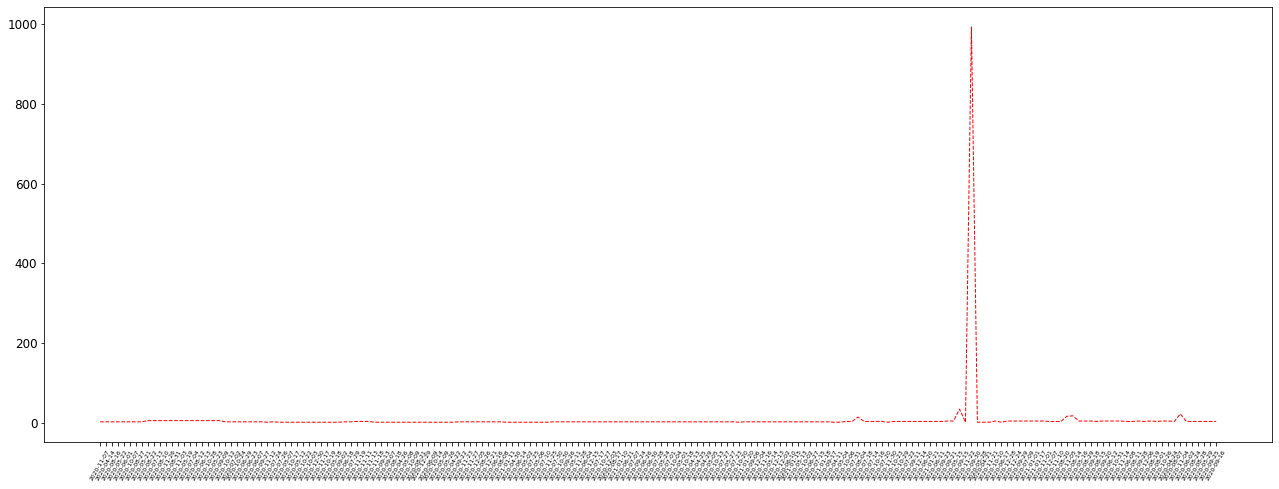

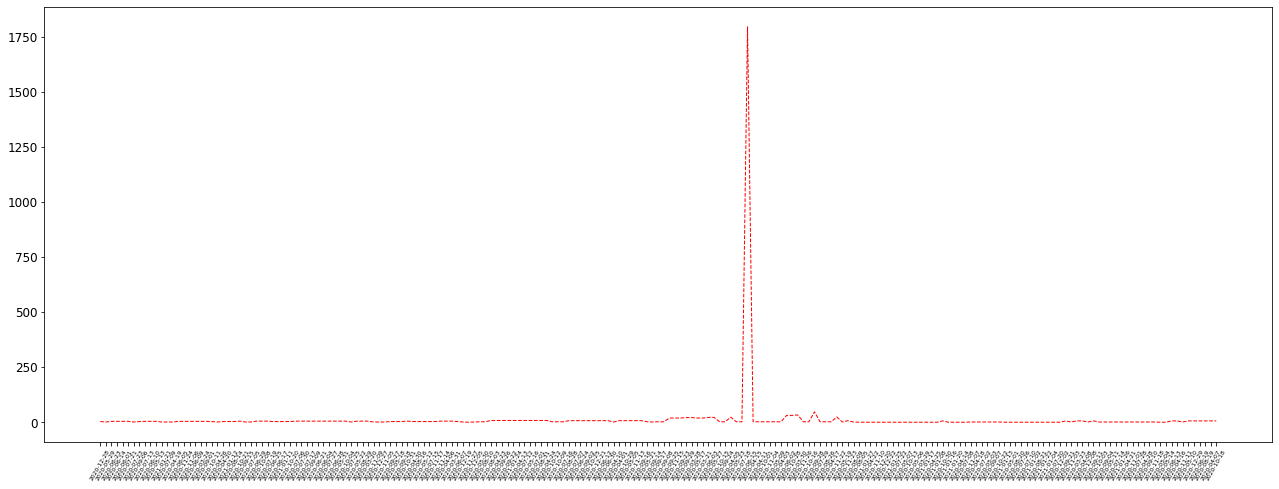

In [63]:
for i in set(new['sessionuserid']):
    plt.figure(figsize=(22, 8)) 
    x = new.loc[new['sessionuserid'].isin([i])]
    plt.plot(x.datevalue, x.LicenseCount_y, color='red', linewidth=1.0, linestyle='--')
    plt.xticks(rotation=60)
    plt.rcParams['ytick.labelsize'] = 12
    plt.rcParams['xtick.labelsize'] = 6
    plt.show()

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7, 10))
axs.boxplot(merge.LicenseCount_y)
axs.set_title('Violin plot')
plt.show()

#### Analyzing the customers with at least 300 days of data

In [3]:
df_4 = pd.read_csv(r'C:\Users\judit.gyorfi\OneDrive - Irdeto B.V\data for thesis\sessionuserid_daily_usage_300.csv')
df_4 = df_4.drop(columns='Unnamed: 0')
df_4

,datevalue,LicenseCount,sessionuserid
0,2020-08-22,9,STI.8150:8150180015718852
1,2020-11-21,18,CAK.001:005223008
2,2020-11-21,8,CHARTER.8357:8357190024100845
3,2020-11-21,31,CAR.202:469514301
4,2020-12-14,10,CHARTER.8245:8245126140012841
...,...,...,...
1411633,2020-05-04,2,CHARTER.8246:8246100610883543
1411634,2020-05-17,1,BHN.003:146841904
1411635,2020-05-16,1,BHN.003:644195501
1411636,2020-03-25,1,CAR.202:240609904


##### I noticed that the biggest outlier is far bigger than any other and I looked for the costumer:

<AxesSubplot:xlabel='datevalue'>

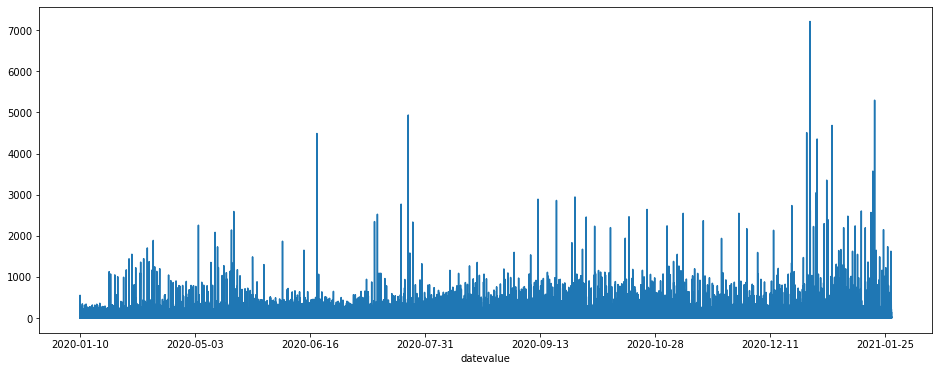

In [4]:
ts = df_4.sort_values('datevalue', ascending=True)
ts = ts.set_index('datevalue')['LicenseCount'].interpolate(method='linear').plot(figsize = (16,6))
ts

In [5]:
df_4.loc[(df_4['LicenseCount'] > 6000)]


,datevalue,LicenseCount,sessionuserid
564180,2020-12-27,7213,NYC.8150:8150100063661101


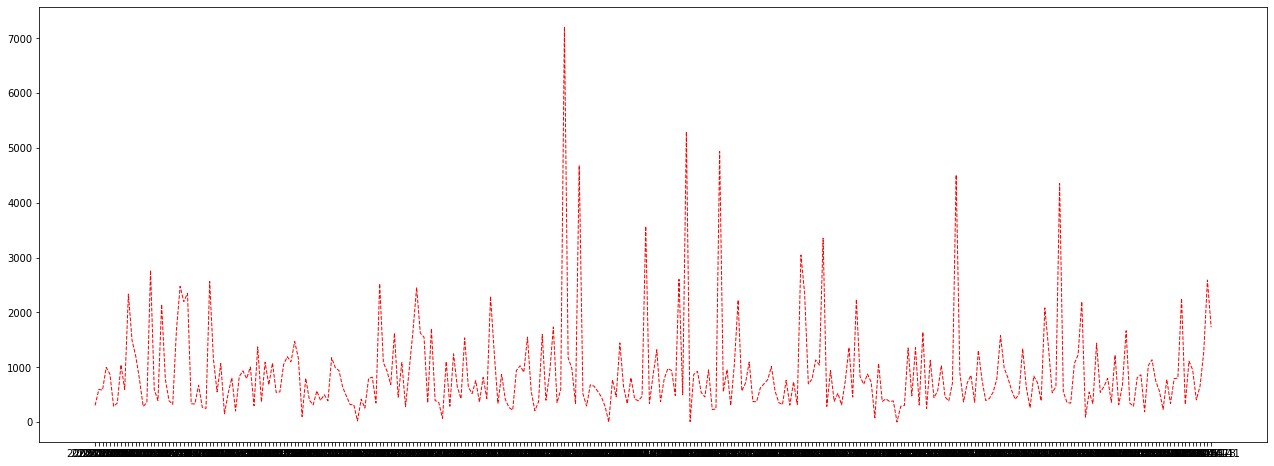

In [6]:
spy = df_4.loc[(df_4['sessionuserid'] == 'NYC.8150:8150100063661101')]
plt.figure(figsize=(22, 8)) 
plt.plot(spy.datevalue, spy.LicenseCount, color='red', linewidth=1.0, linestyle='--')
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 6
plt.show()

In [267]:
spy.isnull().sum()

datevalue        0
LicenseCount     0
sessionuserid    0
dtype: int64

#### This plot made me realize why statistical methods are poor for anomaly detection, since I haven't seen this customer in previous charts because it didn't deviate that much from the average values. Meanwhile it has shown huge fluctuation in licencecount.

### Plotting seasonal decomposition

In [179]:
def set_date_index(input_df, col_name='datevalue'):
    """Given a pandas df, parse and set date column to index.
        col_name will be removed and set as datetime index.

    Args:
        input_df (pandas dataframe): Original pandas dataframe
        col_name (string): Name of date column

    Returns:
        pandas dataframe: modified and sorted dataframe
    """
    # Copy df to prevent changing original
    modified_df = input_df.copy()

    # Infer datetime from col
    modified_df[col_name] = pd.to_datetime(modified_df[col_name])

    # Sort and set index
    modified_df.sort_values(col_name, inplace=True)
    modified_df.set_index(col_name, inplace=True)

    return modified_df

In [184]:
def combine_seasonal_cols(input_df, seasonal_model_results):
    """Adds inplace new seasonal cols to df given seasonal results

    Args:
        input_df (pandas dataframe)
        seasonal_model_results (statsmodels DecomposeResult object)
    """
    # Add results to original df
    input_df['observed'] = seasonal_model_results.observed
    input_df['residual'] = seasonal_model_results.resid
    input_df['seasonal'] = seasonal_model_results.seasonal
    input_df['trend'] = seasonal_model_results.trend

In [189]:
def plot_components(df):
    """Plot data for initial visualization, ultimately visualized in Power BI
    Args:
        df (pandas dataframe)
    """
    df_axis = df.fillna(0)
    ymin = mround(np.min([df_axis.observed, df_axis.trend, df_axis.seasonal, df_axis.residual]),5)
    ymax = mround(np.max([df_axis.observed, df_axis.trend, df_axis.seasonal, df_axis.residual]),5)
    ymin -= 5
    ymax += 5

    plt.figure(figsize=(10,10))

    plt.subplot(4,1,1)
    plt.title("Original Data")
    plt.ylim(ymin, ymax)
    plt.plot(df.index, df.observed)

    plt.subplot(4,1,2)
    plt.title("Trend")
    plt.ylim(ymin, ymax)
    plt.plot(df.index, df.trend)

    plt.subplot(4,1,3)
    plt.title("Seasonal")
    plt.ylim(ymin, ymax)
    plt.plot(df.index, df.seasonal)

    plt.subplot(4,1,4)
    plt.title("Residual")
    plt.ylim(ymin, ymax)
    plt.plot(df.index, df.residual)

    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)

In [196]:
def mround(x, m=5):
    '''Helper method for multiple round'''
    return int(m * round(float(x)/m))

In [268]:
spy = spy[['LicenseCount','datevalue']]
#spy['LicenseCount'] = \
#    spy['LicenseCount'] \
#        / pd.to_datetime(spy['datevalue']).dt.day
spy = set_date_index(spy, 'datevalue')
spy

,LicenseCount
datevalue,
2020-03-23,1
2020-03-29,188
2020-03-30,1128
2020-03-31,1071
2020-04-01,1049
2020-04-02,566
2020-04-03,1004
2020-04-04,232
2020-04-05,992


In [254]:
result = seasonal_decompose(spy,period = 12)
combine_seasonal_cols(spy, result)

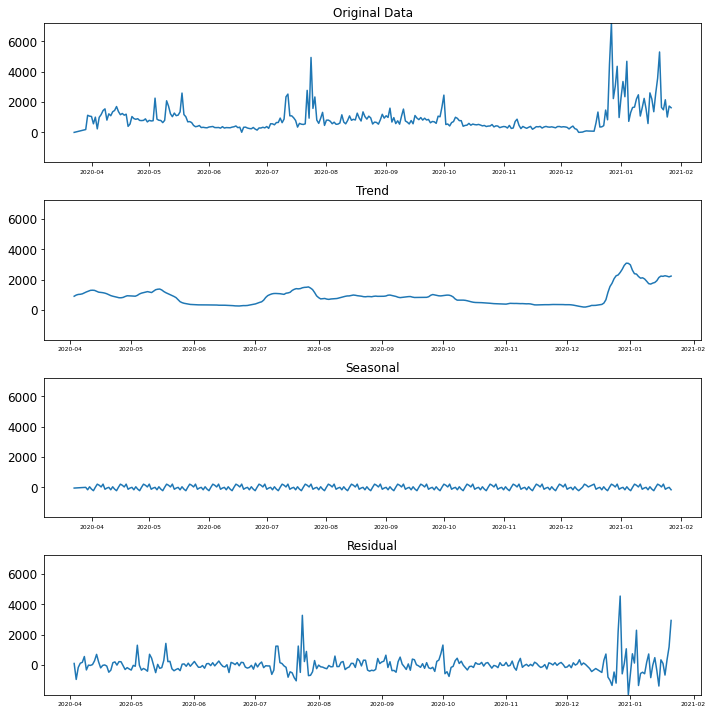

In [255]:
plot_components(spy)
# the average value, 
# a trend (i.e. an increasing mean), 
# seasonality (i.e. a repeating cyclical pattern), 
# and a residual (random noise)

#### Finding the 10 outlier that differs most from their individual average

In [7]:
group_4 = df_4.groupby(['sessionuserid']).sum()
group_4['average_licencecount'] = df_4.groupby(['sessionuserid']).mean()
group_4['std_licencecount'] = df_4.groupby(['sessionuserid']).std()
group_4['var_licencecount'] = df_4.groupby(['sessionuserid']).var()
group_4 = group_4.sort_values('LicenseCount', ascending=False)
merge_4 = group_4.merge(df_4, left_on='sessionuserid', right_on='sessionuserid')
merge_4['diff%'] = merge_4['LicenseCount_y'] / merge_4['average_licencecount']
merge_4.loc[(merge_4['diff%'] > 1.3) | (merge_4['diff%'] < 0.7), 'diff'] = '1'   
merge_4 = merge_4[merge_4['diff'] == '1']
merge_4 = merge_4[merge_4['LicenseCount_x'] > 1000]
merge_4 = merge_4.sort_values('diff%', ascending=False)
merge_4

,sessionuserid,LicenseCount_x,average_licencecount,std_licencecount,var_licencecount,datevalue,LicenseCount_y,diff%,diff
383999,CHARTER.8752:8752200300106696,5819,19.332226,258.477496,66810.615925,2020-06-19,4488,232.151229,1
874711,CAK.001:221036902,3018,9.993377,108.544952,11782.006601,2020-04-16,1887,188.825050,1
227595,MKE.004:063462105,7898,25.073016,128.674716,16557.182550,2020-05-17,2141,85.390605,1
620309,KYA.003:147067605,4161,13.336538,61.765547,3814.982841,2020-06-19,1064,79.780822,1
317933,CAR.202:917926801,6521,20.900641,73.948446,5468.372733,2020-05-29,1299,62.151204,1
...,...,...,...,...,...,...,...,...,...
1249,NYC.8150:8150100042909977,96979,279.478386,223.092146,49770.105745,2020-02-12,1,0.003578,1
1143,NYC.8150:8150100042909977,96979,279.478386,223.092146,49770.105745,2020-02-22,1,0.003578,1
139,NYC.8150:8150100063661101,275248,908.409241,865.800570,749610.626669,2020-12-10,2,0.002202,1
460,TWC.999:900028101,221133,688.887850,522.191051,272683.493633,2020-02-10,1,0.001452,1


In [10]:
anom_2 = merge_4['sessionuserid'][-5:]
anom_2 = anom_2.to_list()
anom_2

['NYC.8150:8150100042909977',
 'NYC.8150:8150100042909977',
 'NYC.8150:8150100063661101',
 'TWC.999:900028101',
 'NYC.8150:8150100063661101']

In [271]:
new_4 = merge_4[merge_4['sessionuserid'].isin(anom_2)].sort_values('datevalue', ascending=True)

In [269]:
ts_4 = set_date_index(new_4, 'datevalue')


In [ ]:
for i in set(ts_4['sessionuserid']):
    result = seasonal_decompose(ts_4['LicenseCount_y'][i],period = 12)
    combine_seasonal_cols(ts_4, result)
    print('This is the sessionuserid, namely {}'.format([i]))
    plot_components(ts_4)
    

#### Top10 most potentially anomalous costumer plotted together against time

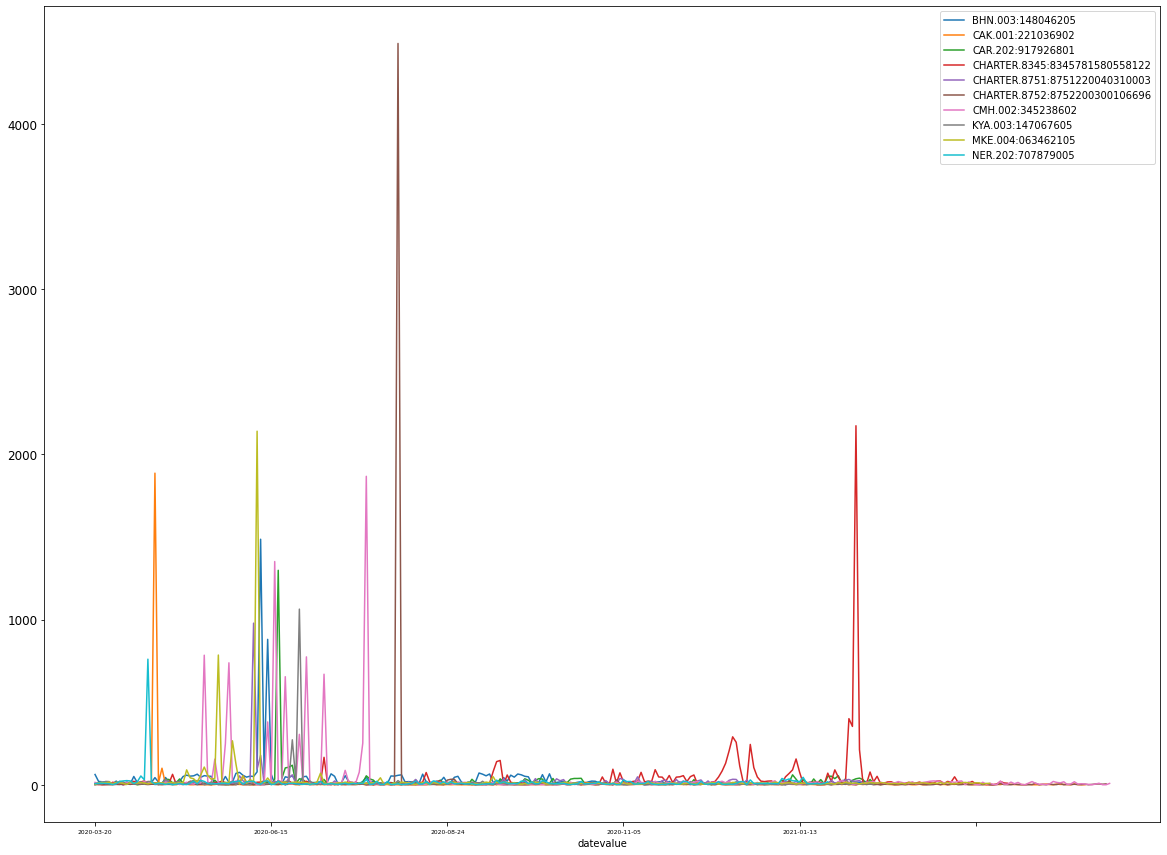

In [270]:
fig, ax = plt.subplots(figsize=(20, 15))
#ax.set_yscale('log')
for section, group in new_4.groupby('sessionuserid'):
    group.plot(x='datevalue', y='LicenseCount_y', ax=ax, label=section)


#### Individual patterns on a log scale

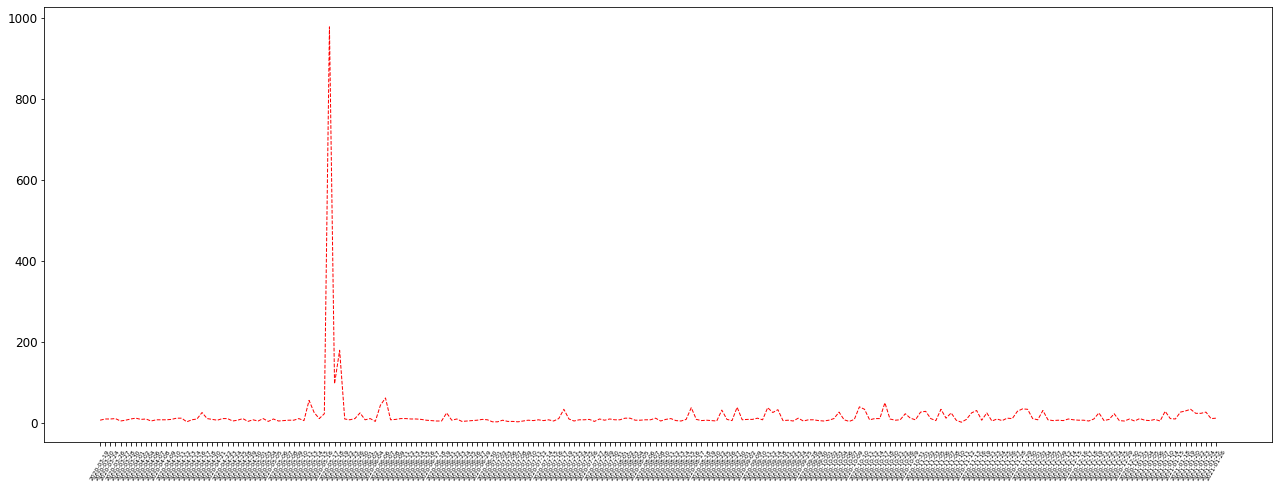

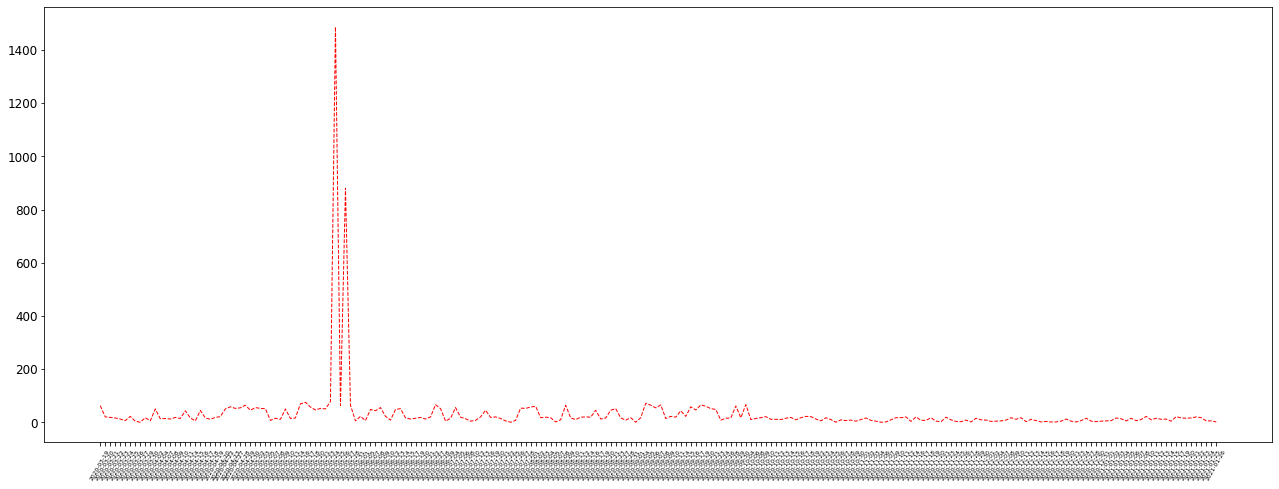

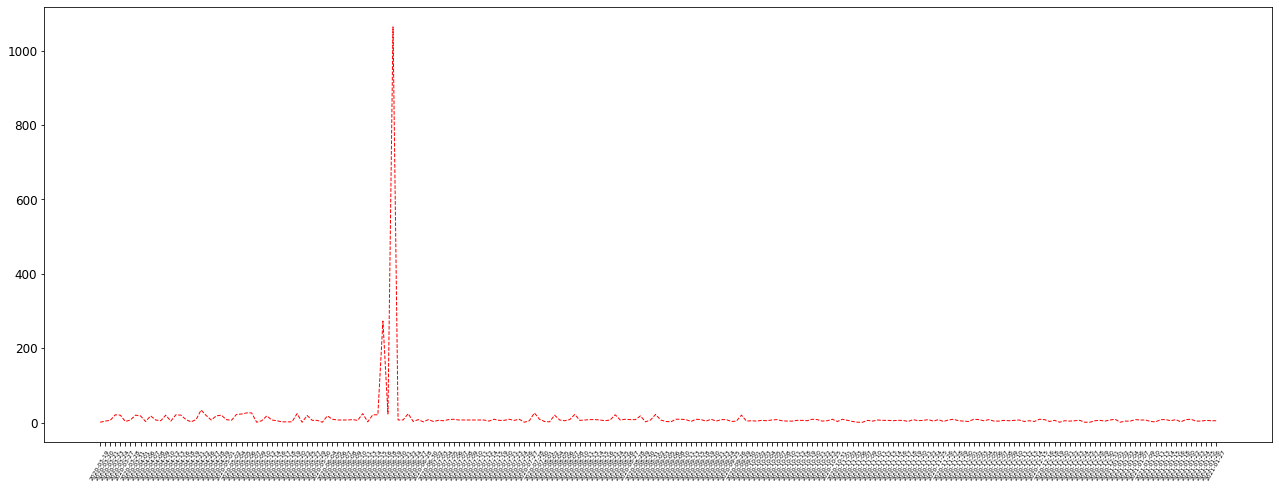

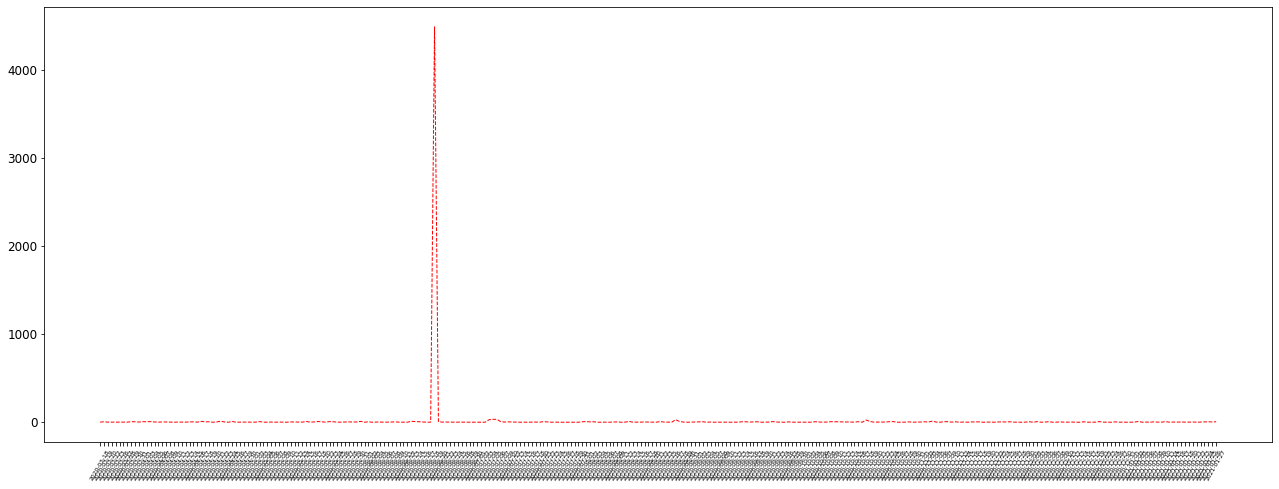

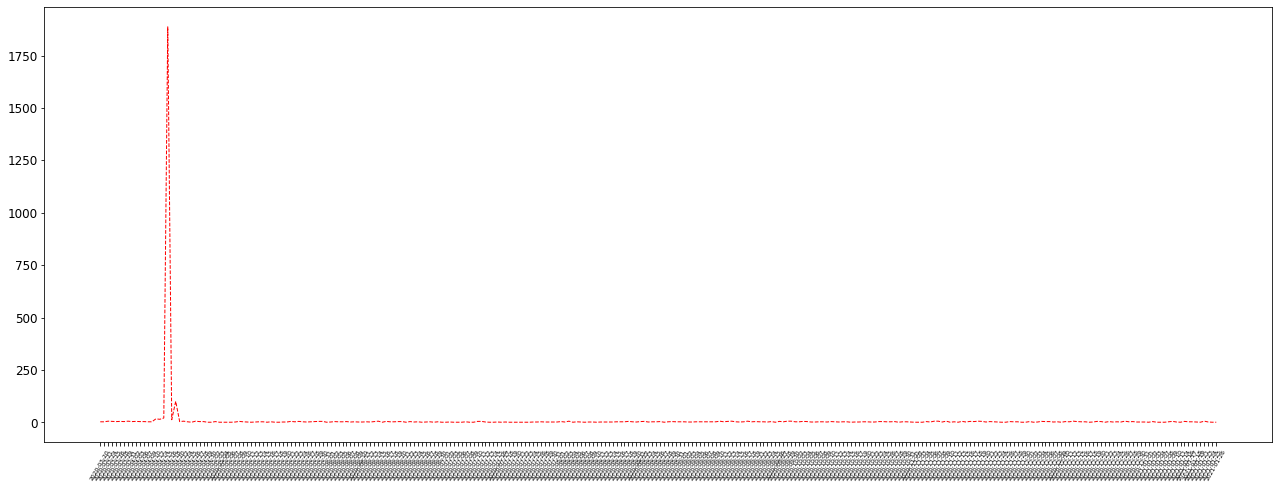

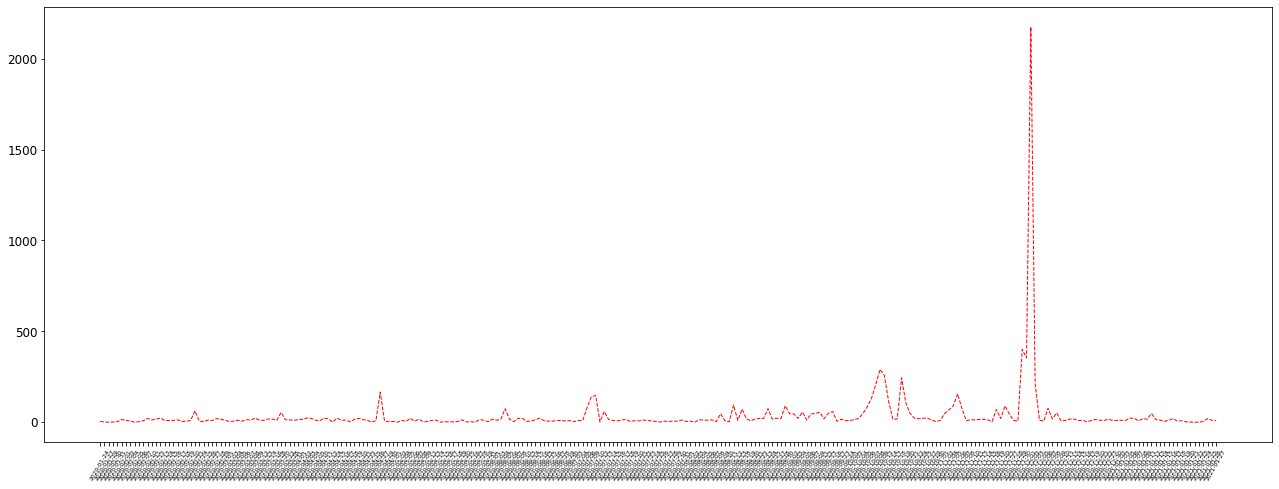

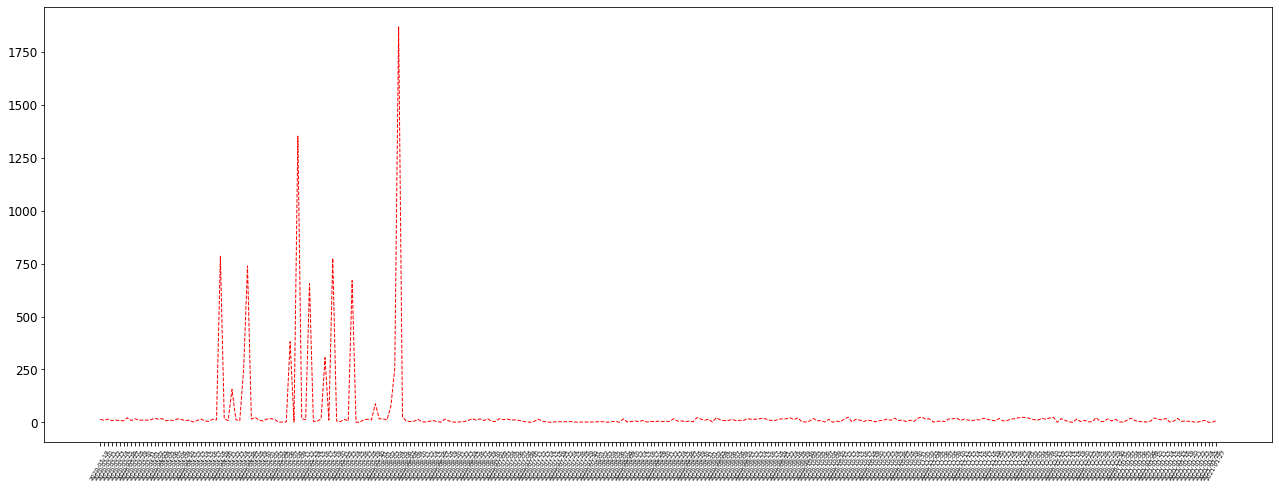

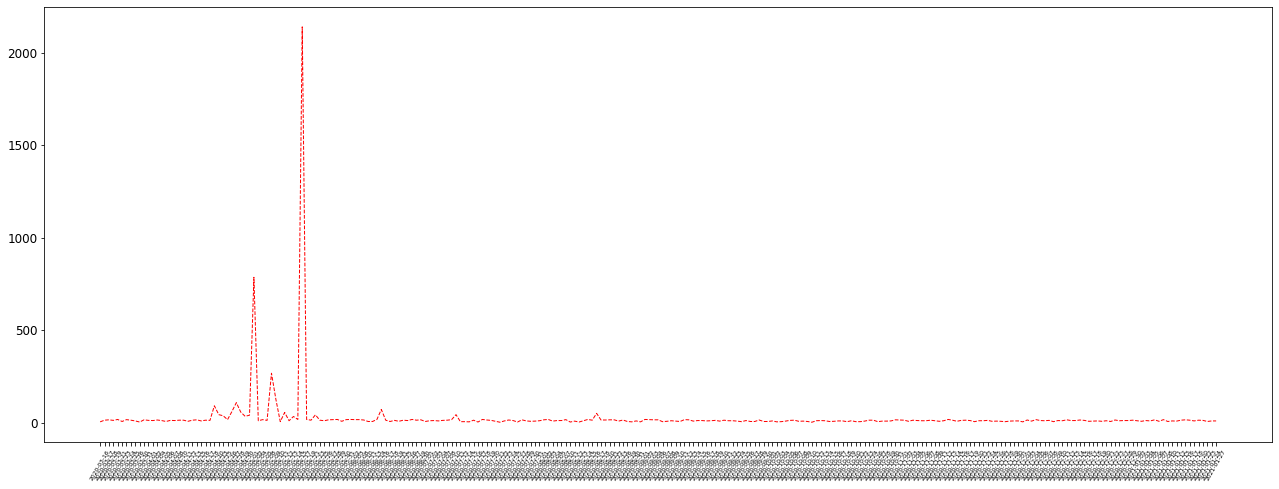

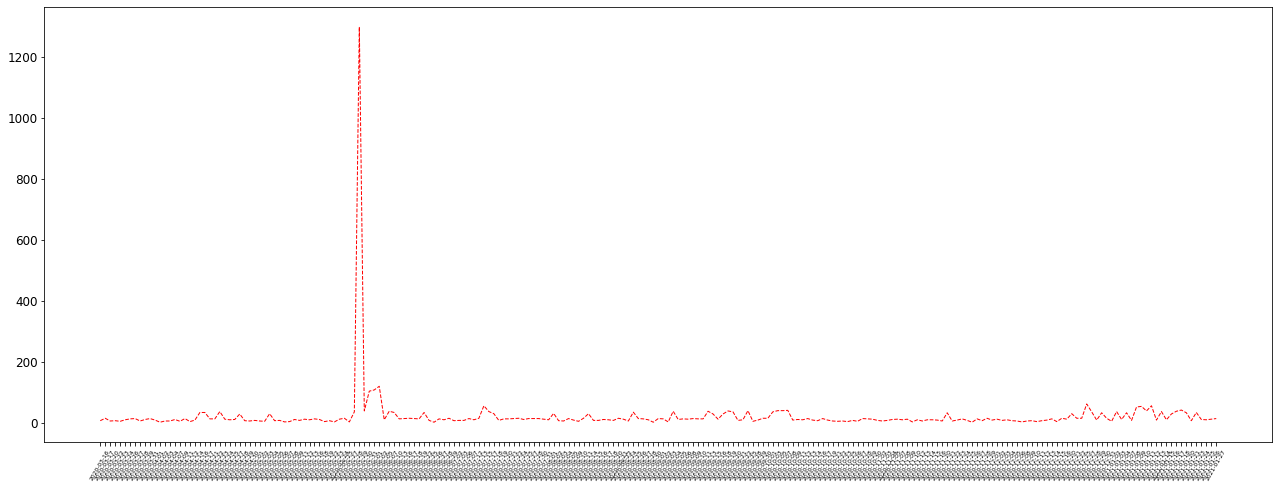

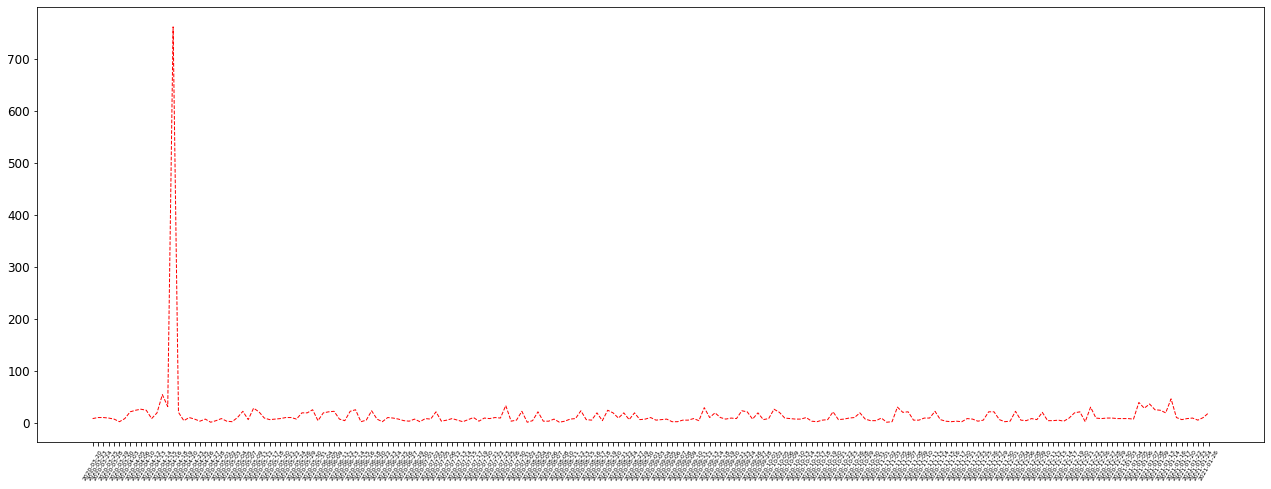

In [272]:
for i in set(new_4['sessionuserid']):
    plt.figure(figsize=(22, 8)) 
    x = new_4.loc[new_4['sessionuserid'].isin([i])]
    plt.plot(x.datevalue, x.LicenseCount_y, color='red', linewidth=1.0, linestyle='--')
    plt.xticks(rotation=60)
    plt.rcParams['ytick.labelsize'] = 12
    plt.rcParams['xtick.labelsize'] = 6
    plt.yscale('log')
    plt.show()

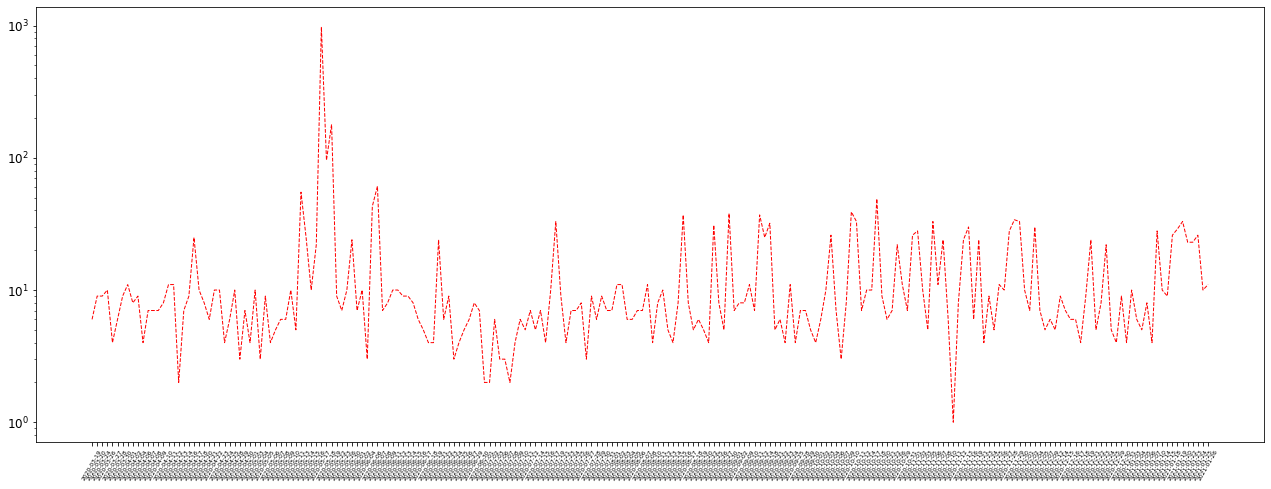

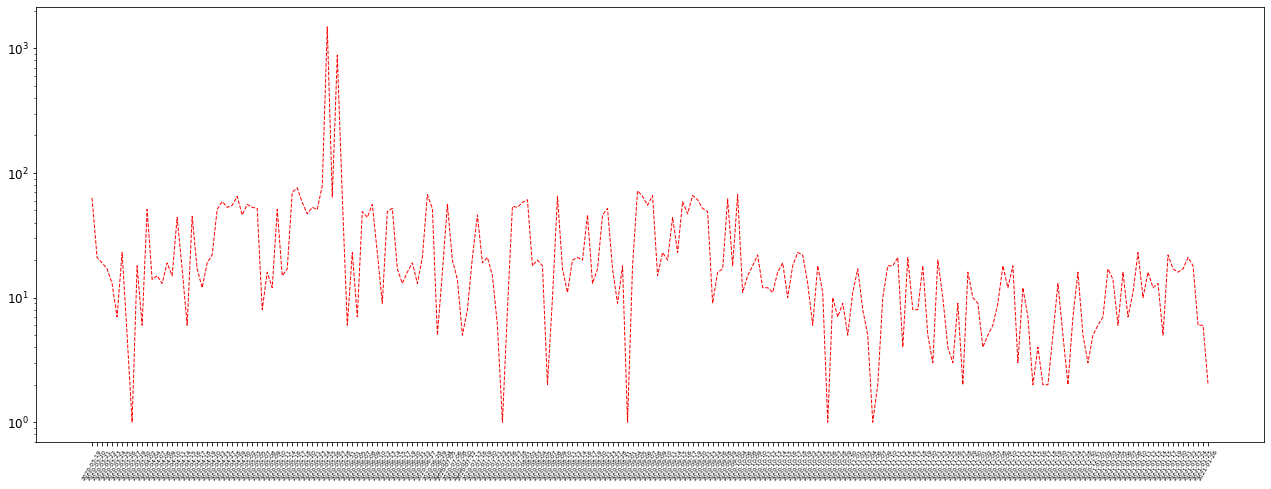

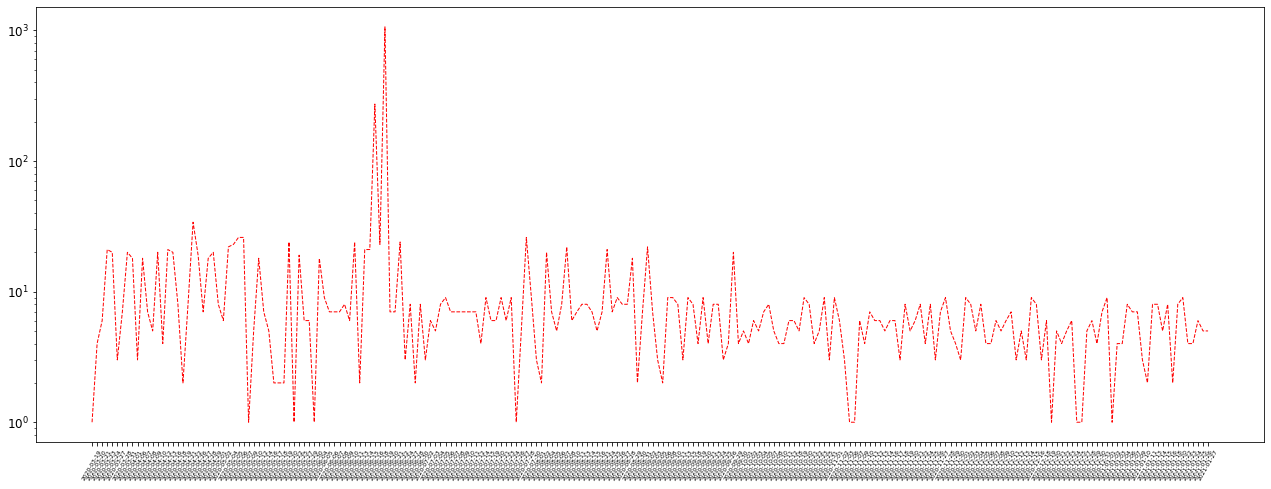

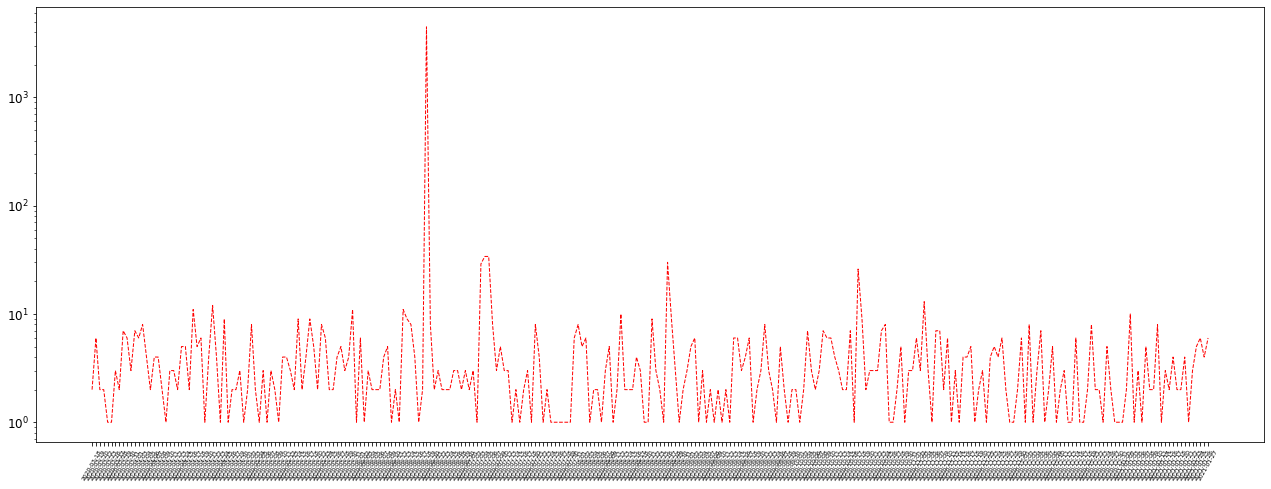

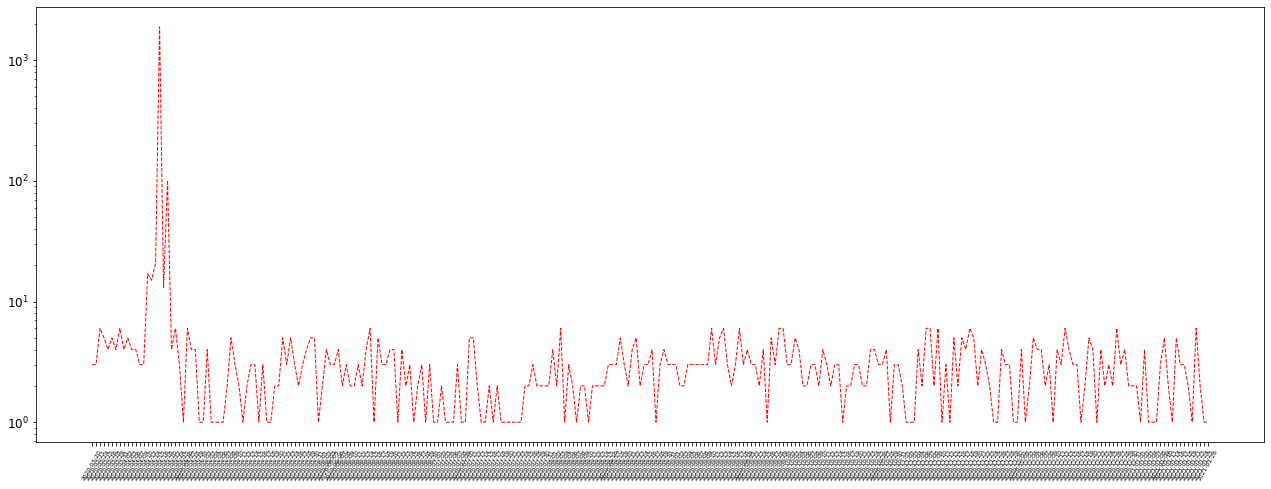

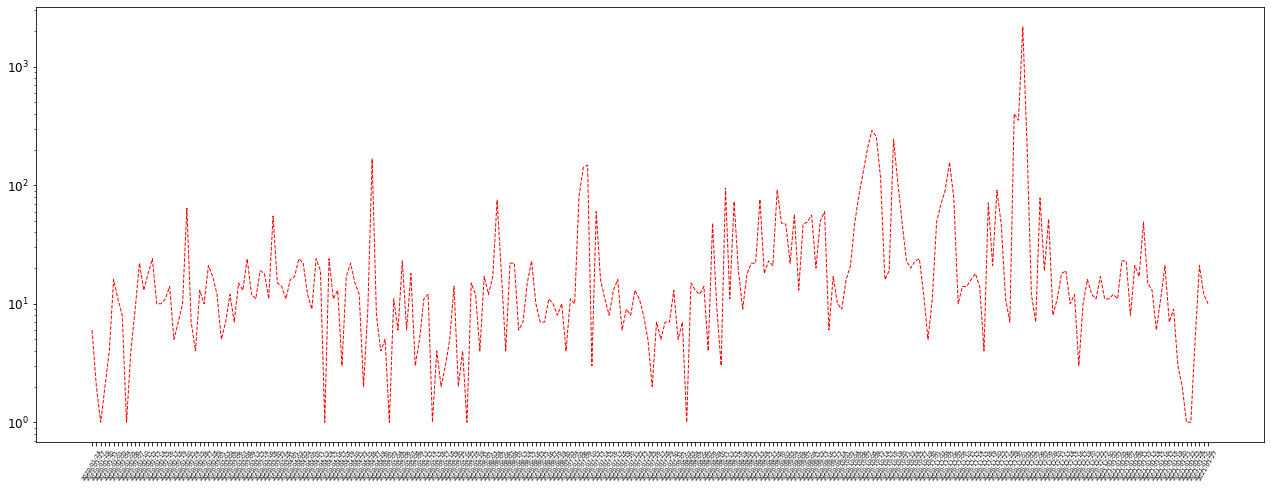

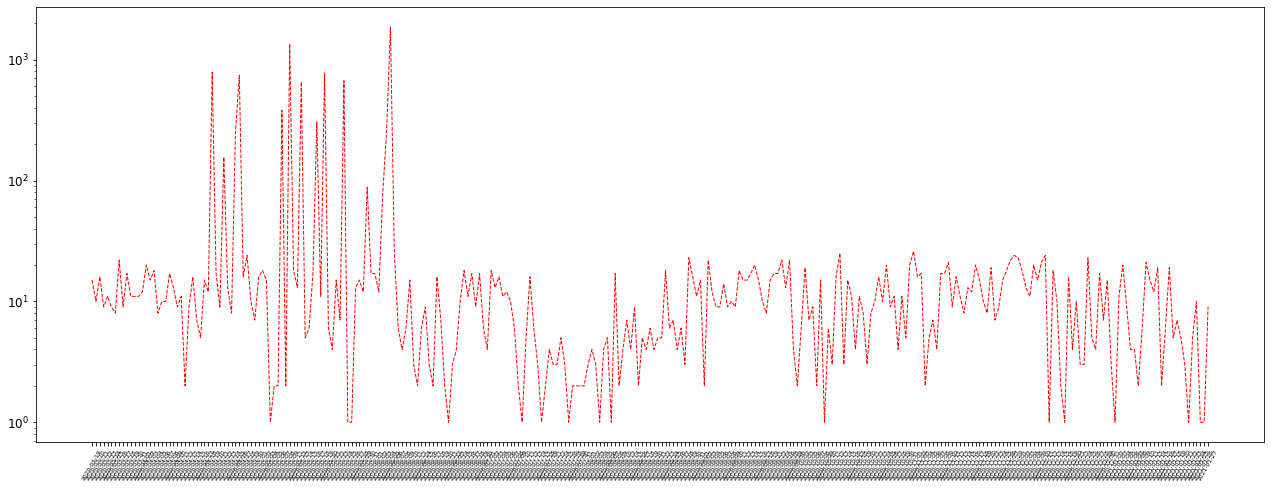

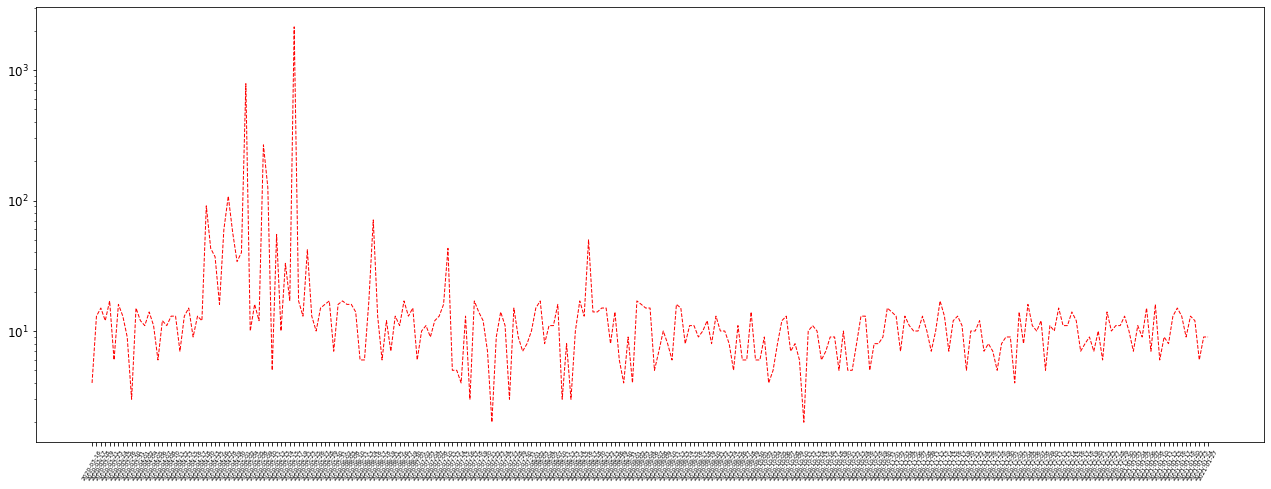

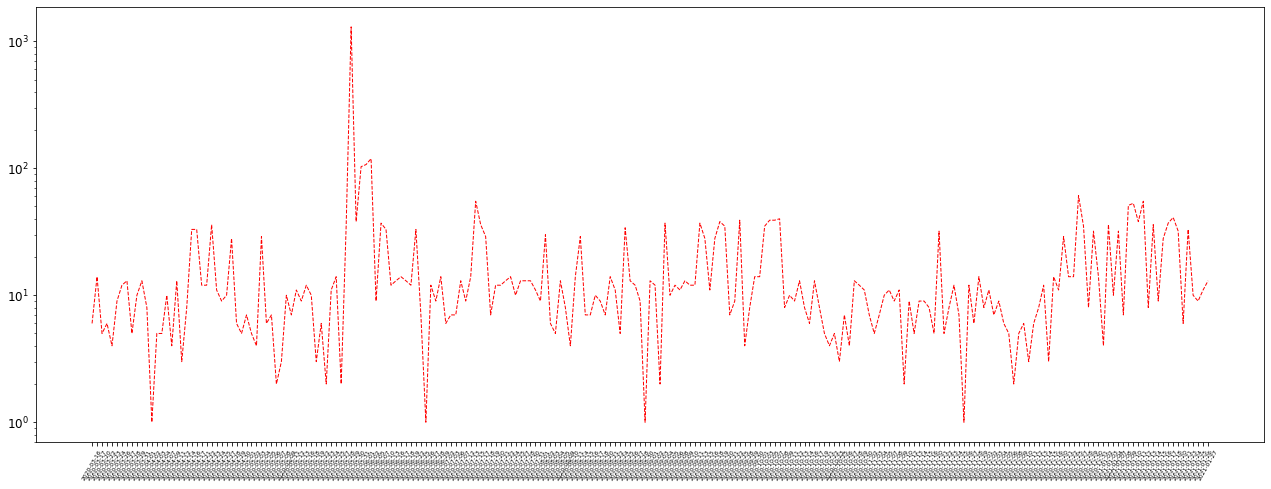

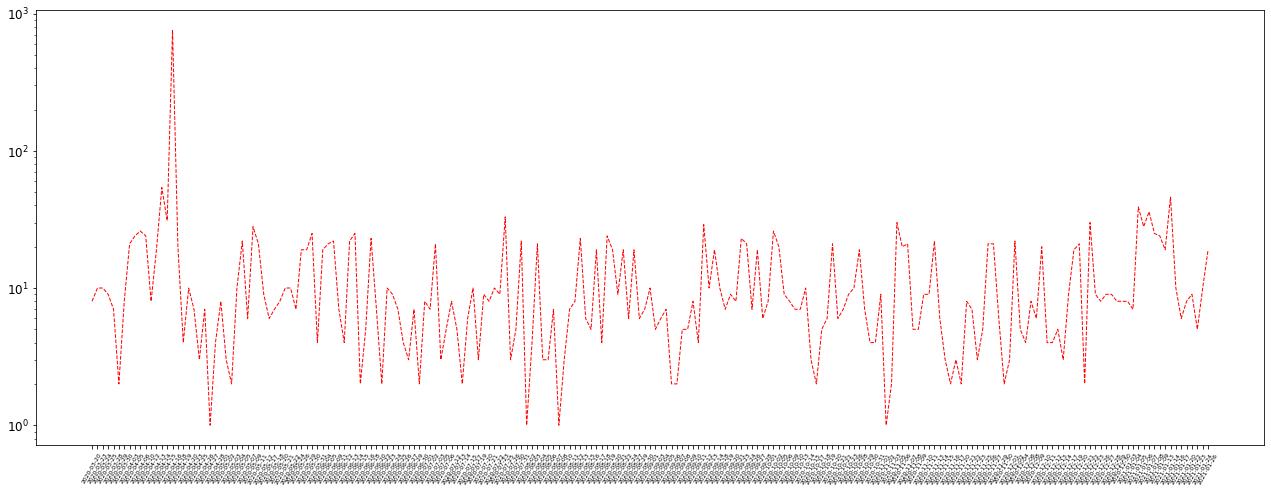

In [273]:
for i in set(new_4['sessionuserid']):
    plt.figure(figsize=(22, 8)) 
    x = new_4.loc[new_4['sessionuserid'].isin([i])]
    plt.plot(x.datevalue, x.LicenseCount_y, color='red', linewidth=1.0, linestyle='--')
    plt.xticks(rotation=60)
    plt.rcParams['ytick.labelsize'] = 12
    plt.rcParams['xtick.labelsize'] = 6
    plt.yscale('log')
    plt.show()